# Part 1: Obtaining the Data

In [ ]:


# Import the neccessary modules for data manipulation and visual representation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline


import os
os.chdir('E:\\MAJOR PROJECT')

In [72]:

#Read the analytics csv file and store our dataset into a dataframe called "df"
df = pd.read_csv("Hr_comma_sep.csv")
   

#  Part 2: Scrubbing the Data

In [4]:
   
# Get a quick overview of what we are dealing with in our dataset

df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
 
# Check to see if there are any missing values in our data set

df.isnull().any()


satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [74]:

# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })


In [75]:

# Move the reponse variable "turnover" to the front of the table
front = df['turnover']
df.drop(labels=['turnover'], axis=1,inplace = True)
df.insert(0, 'turnover', front)
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


# Part 3 : Exploring the Data
    

In [10]:
  
  ##  3a. Statistical Overview 

df.shape


(14999, 10)

In [11]:

# Check the type of our features
df.dtypes


turnover                 int64
satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
department              object
salary                  object
dtype: object

In [17]:
# NOTE:It is important to maintain the turnover ratio

turnover_rate = df.turnover.value_counts() / len(df)
turnover_rate


0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [16]:
# Display the statistical overview of the employees

df.describe()


,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [15]:
# Overview of summary (Turnover V.S. Non-turnover)

turnover_Summary = df.groupby('turnover')
turnover_Summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [18]:
#Correlation Matrix

corr = df.corr()
corr


,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
satisfaction,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
projectCount,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
averageMonthlyHours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
yearsAtCompany,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
workAccident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


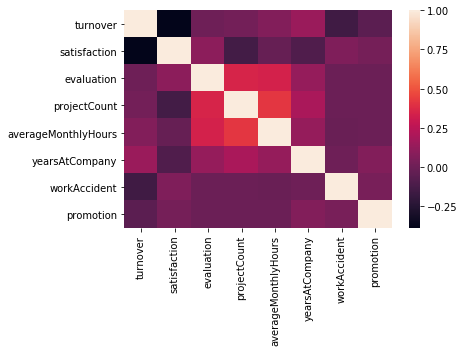

In [19]:
#Heatmap 

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


In [37]:
#Let's compare the means of our employee turnover satisfaction against 
# the employee population satisfaction

emp_population = df['satisfaction'][df['turnover'] == 0].mean()
emp_turnover_satisfaction = df[df['turnover']==1]['satisfaction'].mean()

print( 'The mean satisfaction for the employee population with no turnover is: ' + str(emp_population))
print( 'The mean satisfaction for employees that had a turnover is: ' + str(emp_turnover_satisfaction) )


The mean satisfaction for the employee population with no turnover is: 0.666809590479516
The mean satisfaction for employees that had a turnover is: 0.44009801176140917


# Exploratory Data Analysis

In [ ]:
#1. Salary V.S. Turnover


f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='turnover', data=df).set_title('Employee Salary Turnover Distribution');



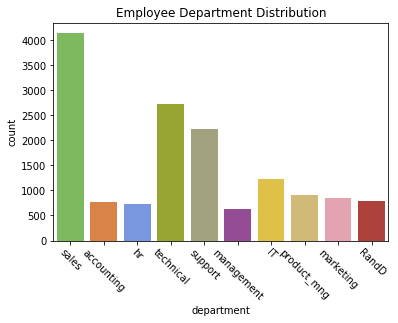

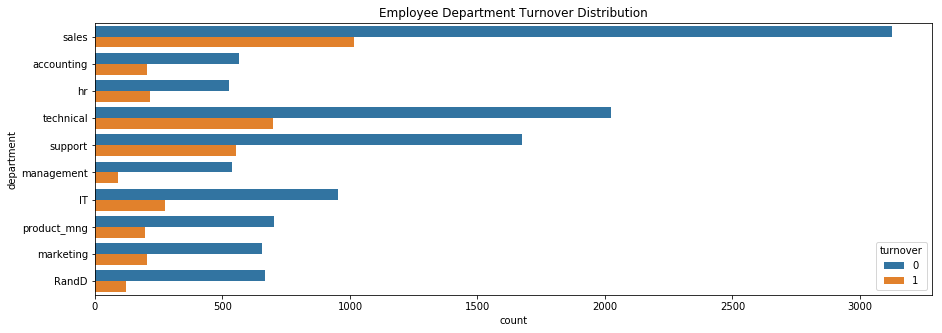

In [29]:


# 2. Department V.S. Turnover

# Employee distri
# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']



# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='department', data=df, palette=color_types).set_title('Employee Department Distribution');
 
# Rotate x-labels
plt.xticks(rotation=-45)


f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="department", hue='turnover', data=df).set_title('Employee Department Turnover Distribution');



[Text(0,0.5,'Percent')]

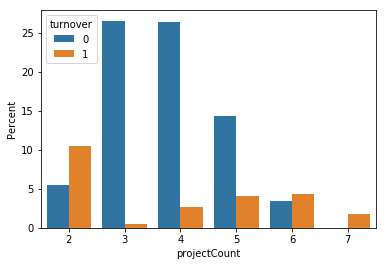

In [22]:

#3 . Turnover V.S. ProjectCount


ax = sns.barplot(x="projectCount", y="projectCount", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")


Text(0.5,1,'Employee Evaluation Distribution - Turnover V.S. No Turnover')

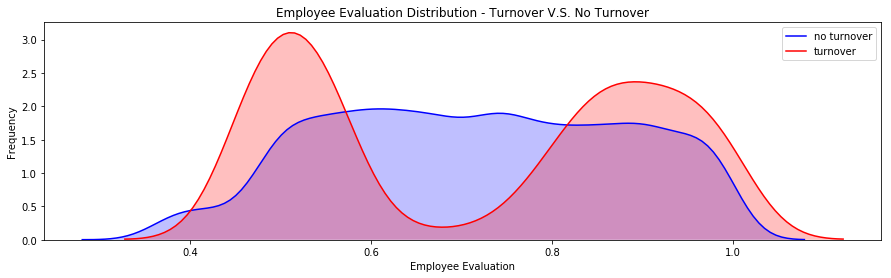

In [23]:

#4. Turnover V.S. Evaluation

# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'evaluation'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Evaluation', ylabel='Frequency')
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')


Text(0.5,1,'Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

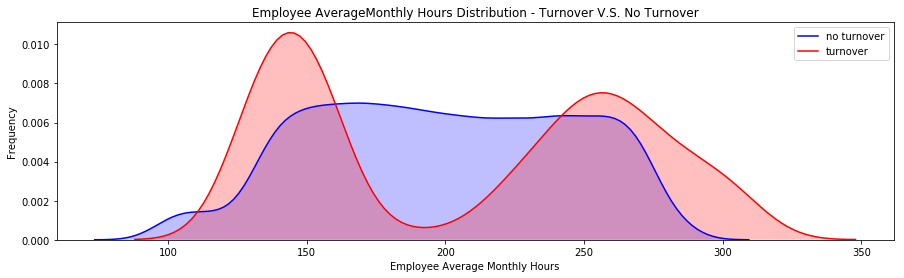

In [24]:

#5. Turnover V.S. AverageMonthlyHours

#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'averageMonthlyHours'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'averageMonthlyHours'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Average Monthly Hours', ylabel='Frequency')
plt.title('Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')



Text(0.5,1,'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

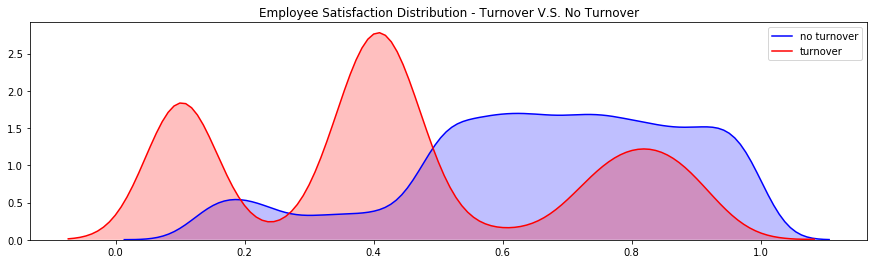

In [27]:
#6. Turnover V.S. Satisfaction

#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'satisfaction'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'satisfaction'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')

[Text(0,0.5,'Percent')]

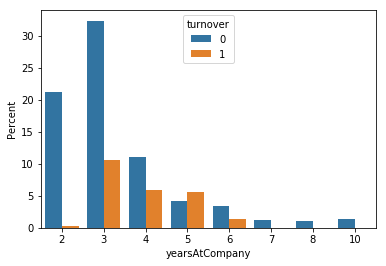

In [28]:

#7. Turnover V.S. YearsAtCompany

ax = sns.barplot(x="yearsAtCompany", y="yearsAtCompany", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

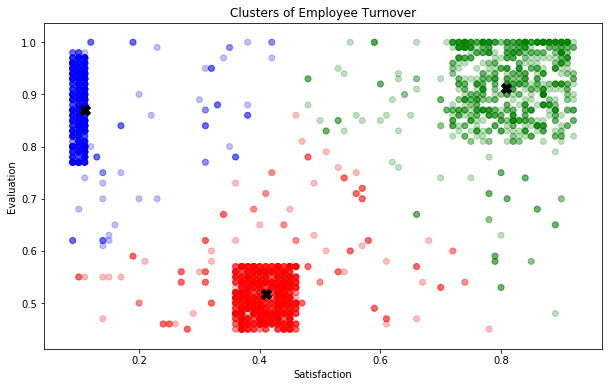

In [30]:

##  K-Means Clustering of Employee Turnover

# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.turnover==1][["satisfaction","evaluation"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction",y="evaluation", data=df[df.turnover==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()


In [76]:

  
y=df['turnover']

X = df.drop('turnover', axis=1)


In [77]:
from sklearn.cross_validation import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=69)

In [80]:

# Feature Importance

from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier(n_estimators=300,max_depth=7,min_samples_leaf=5,class_weight='balanced',random_state=69)
rclf.fit(X_train,y_train)
rclf.feature_importances_
dict(zip(X.columns.values,rclf.feature_importances_))

ValueError: could not convert string to float: 'medium'

In [44]:

df.columns

Index(['turnover', 'satisfaction', 'evaluation', 'projectCount',
       'averageMonthlyHours', 'yearsAtCompany', 'workAccident', 'promotion',
       'department', 'salary'],
      dtype='object')

In [52]:

indep_var = ['satisfaction', 'evaluation', 'yearsAtCompany', 'turnover']

df = df[indep_var]

X = df.drop('turnover', axis=1)  
y=df['turnover']


In [53]:
from sklearn.cross_validation import train_test_split

C:\Users\Rajesh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=69)

In [ ]:
#Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
glm = LogisticRegression(class_weight='balanced',random_state=69)

In [57]:
glm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=69,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [58]:
glm.intercept_

array([0.67042116])

In [59]:
glm.coef_

array([[-3.89639088,  0.19087765,  0.38081134]])

In [64]:
#Prediction on Train Data

In [60]:
glm_pred_tr = glm.predict(X_train)

In [65]:
#Validation on Train Data

In [66]:
from sklearn.metrics import classification_report,confusion_matrix

In [67]:
print(confusion_matrix(y_train,glm_pred_tr))

[[6061 1966]
 [ 625 1847]]


In [68]:
print(classification_report(y_train,glm_pred_tr))

             precision    recall  f1-score   support

          0       0.91      0.76      0.82      8027
          1       0.48      0.75      0.59      2472

avg / total       0.81      0.75      0.77     10499



In [ ]:
#Predictions on Test Data

In [69]:
glm_pred = glm.predict(X_test)

In [ ]:
#Validation on test data

In [70]:
print(confusion_matrix(y_test,glm_pred))

[[2543  858]
 [ 276  823]]


In [71]:
print(classification_report(y_test,glm_pred))

             precision    recall  f1-score   support

          0       0.90      0.75      0.82      3401
          1       0.49      0.75      0.59      1099

avg / total       0.80      0.75      0.76      4500



In [ ]:

##Decision Tree Model


dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)
print ("\n\n ---Decision Tree Model---")
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dt_roc_auc)
print(classification_report(y_test, dtree.predict(X_test)))


In [ ]:

##Random Forest Model


rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02 
    )
rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))


In [ ]:


##ROC Graph


# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logis.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

